In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/kaggle/input/hackathonnn/DATA FOR HACKTHON.csv")

In [5]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Ambassador CLASSIC 1500 DSL AC,2000,75000,90000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1489 CC,35.5 bhp,72.9Nm@ 2250rpm,5.0
1,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
2,Ambassador Grand 1500 DSZ BSIII,2008,122000,60000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
3,Ambassador Grand 2000 DSZ PW CL,2008,200000,80000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
4,Ashok Leyland Stile LE,2013,300000,200000,Diesel,Individual,Manual,Second Owner,20.07 kmpl,1461 CC,75 bhp,185Nm@ 1750-2750rpm,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
8124,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
8125,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
8126,Volvo XC60 Inscription D5 BSIV,2018,5500000,50000,Diesel,Individual,Automatic,First Owner,11.2 kmpl,1969 CC,235 bhp,480Nm,5.0


In [6]:
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
import re

In [8]:
def split_max_power(str_):
    try:
        float_res = float(str_.split(" ")[0])

        return float_res
    except:
        return np.NaN


def split_torque(str_):
    try:
        float_res  = float(re.findall("\d+", str_)[0])

        return float_res
    except:
        return np.NaN

df["mileage"] = df["mileage"].str.split(" ").str[0].astype("float")
df["engine"] = df["engine"].str.split(" ").str[0].astype("float")
df["max_power"] = df["max_power"].apply(split_max_power)
df["torque"] = df["torque"].apply(split_torque)
df["name"] = df["name"].str.split(" ").str[0]

df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']] = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']].fillna(df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']].median())

# fill numeric with median
df[['name', 'fuel', 'seller_type', 'transmission', 'owner']] = df[['name', 'fuel', 'seller_type', 'transmission', 'owner']].fillna(df[['name', 'fuel', 'seller_type', 'transmission', 'owner']].mode())

In [9]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Ambassador,2000,75000,90000,Diesel,Individual,Manual,Second Owner,12.80,1489.0,35.5,72.0,5.0
1,Ambassador,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52.0,106.0,5.0
2,Ambassador,2008,122000,60000,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52.0,106.0,5.0
3,Ambassador,2008,200000,80000,Diesel,Individual,Manual,Third Owner,13.50,1995.0,52.0,106.0,5.0
4,Ashok,2013,300000,200000,Diesel,Individual,Manual,Second Owner,20.07,1461.0,75.0,185.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Volvo,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.0,400.0,5.0
8124,Volvo,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.00,1969.0,190.0,400.0,5.0
8125,Volvo,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.00,1969.0,190.0,400.0,5.0
8126,Volvo,2018,5500000,50000,Diesel,Individual,Automatic,First Owner,11.20,1969.0,235.0,480.0,5.0


In [10]:
df = pd.get_dummies(df, columns = ['name','fuel', 'seller_type', 'transmission', 'owner'])
df

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ambassador,name_Ashok,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2000,75000,90000,12.80,1489.0,35.5,72.0,5.0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1994,99000,100000,12.80,1995.0,52.0,106.0,5.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,2008,122000,60000,12.80,1995.0,52.0,106.0,5.0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,2008,200000,80000,13.50,1995.0,52.0,106.0,5.0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,2013,300000,200000,20.07,1461.0,75.0,185.0,8.0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2019,3800000,20000,18.00,1969.0,190.0,400.0,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
8124,2018,3400000,22000,18.00,1969.0,190.0,400.0,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
8125,2018,3400000,22000,18.00,1969.0,190.0,400.0,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,2018,5500000,50000,11.20,1969.0,235.0,480.0,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import xgboost as xgb

In [15]:
model = xgb.XGBRegressor(subsample=0.5)
model.fit(X_train, y_train)
print(); 
print(model)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [16]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [20]:
# Creating a Function for MAPE
import numpy as np
pred = predicted_y
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
mape(y_test, pred)

0.17377840935078814

In [23]:
model.get_booster().get_score(importance_type='gain')

{'year': 1515839029248.0,
 'km_driven': 102992797696.0,
 'mileage': 190358388736.0,
 'engine': 252373172224.0,
 'max_power': 8758073229312.0,
 'torque': 483215704064.0,
 'seats': 239790505984.0,
 'name_Audi': 281665961984.0,
 'name_BMW': 54918270976.0,
 'name_Chevrolet': 391438499840.0,
 'name_Datsun': 33525710848.0,
 'name_Fiat': 59734061056.0,
 'name_Force': 54903300096.0,
 'name_Ford': 80065118208.0,
 'name_Honda': 136104452096.0,
 'name_Hyundai': 60060884992.0,
 'name_Isuzu': 113777786880.0,
 'name_Jaguar': 45955846144.0,
 'name_Jeep': 510258610176.0,
 'name_Kia': 71490781184.0,
 'name_Land': 343672651776.0,
 'name_Mahindra': 35346616320.0,
 'name_Maruti': 201030877184.0,
 'name_Mercedes-Benz': 420218830848.0,
 'name_Mitsubishi': 26635173888.0,
 'name_Nissan': 22662144000.0,
 'name_Renault': 42387476480.0,
 'name_Skoda': 150308225024.0,
 'name_Tata': 317395369984.0,
 'name_Toyota': 367636971520.0,
 'name_Volkswagen': 91799699456.0,
 'name_Volvo': 582317703168.0,
 'fuel_Diesel': 120

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

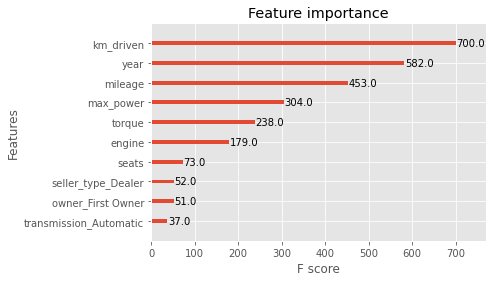

In [25]:
xgb.plot_importance(model, max_num_features=10)